# Классификация в Machine Learning
## Лекция: Мультикласс, Мультилейбл, Feature Engineering и KNN

![Machine Learning](https://miro.medium.com/max/1400/1*c_fiB-YgbnMl6nntYGBMHQ.jpeg)

### План лекции (90 минут):
1. Введение в классификацию
2. Типы классификации: бинарная, мультикласс, мультилейбл
3. Работа с категориальными признаками
4. Feature Engineering для классификации
5. Алгоритм K-Nearest Neighbors (KNN)
6. Процесс обучения: эпохи, батчи, градиентный спуск
7. Практические примеры

---
## 1. Введение в классификацию

**Классификация** - это задача машинного обучения с учителем, где модель предсказывает категорию (класс) объекта.
примеры задач классификации:
- Определение спама в email
- Распознавание рукописных цифр
- Диагностика заболеваний
- Определение тональности текста

In [1]:
# Установка необходимых библиотек
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.datasets import load_iris, make_classification

# Настройка визуализации
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette('husl')
%matplotlib inline

---
## 2. Типы классификации

### 2.1 Бинарная классификация
Два класса: 0 или 1, True или False, Да или Нет

![Binary Classification](https://miro.medium.com/max/1400/1*jlbwHaAkW8GlaVdJQiVqhQ.png)

**Примеры:**
- Спам или не спам
- Болен или здоров
- Кредит одобрен или отклонен

ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ (EDA) - БИНАРНАЯ КЛАССИФИКАЦИЯ

1. ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:
   Размер датасета: 500 строк, 11 столбцов
   Количество признаков: 10

   Первые 5 строк:
   Признак_1  Признак_2  Признак_3  Признак_4  Признак_5  Признак_6  \
0   0.194575   0.242392  -0.634730   0.953775  -1.336766  -0.547444   
1  -1.149237   1.634404  -1.380155  -0.112738   0.066284   0.530130   
2  -1.778488  -0.970403  -1.829073   0.161208   0.302966   3.116487   
3  -4.804335  -2.295594  -3.400611  -2.708404  -0.534834   3.405773   
4   3.636836  -0.288195   3.465235   0.293483   0.382788   0.268309   

   Признак_7  Признак_8  Признак_9  Признак_10  Целевая  
0  -0.078846   0.678763  -1.302107    0.205192        0  
1   0.844994   1.847824  -0.570110   -1.277871        0  
2  -1.834058   2.127292  -0.940214   -0.073789        1  
3  -1.803145   6.789684   1.172751   -2.482434        1  
4   0.443645  -0.676740  -0.688075   -1.736376        0  

2. СТАТИСТИЧЕСКОЕ ОПИСАНИЕ:
        Признак_1  

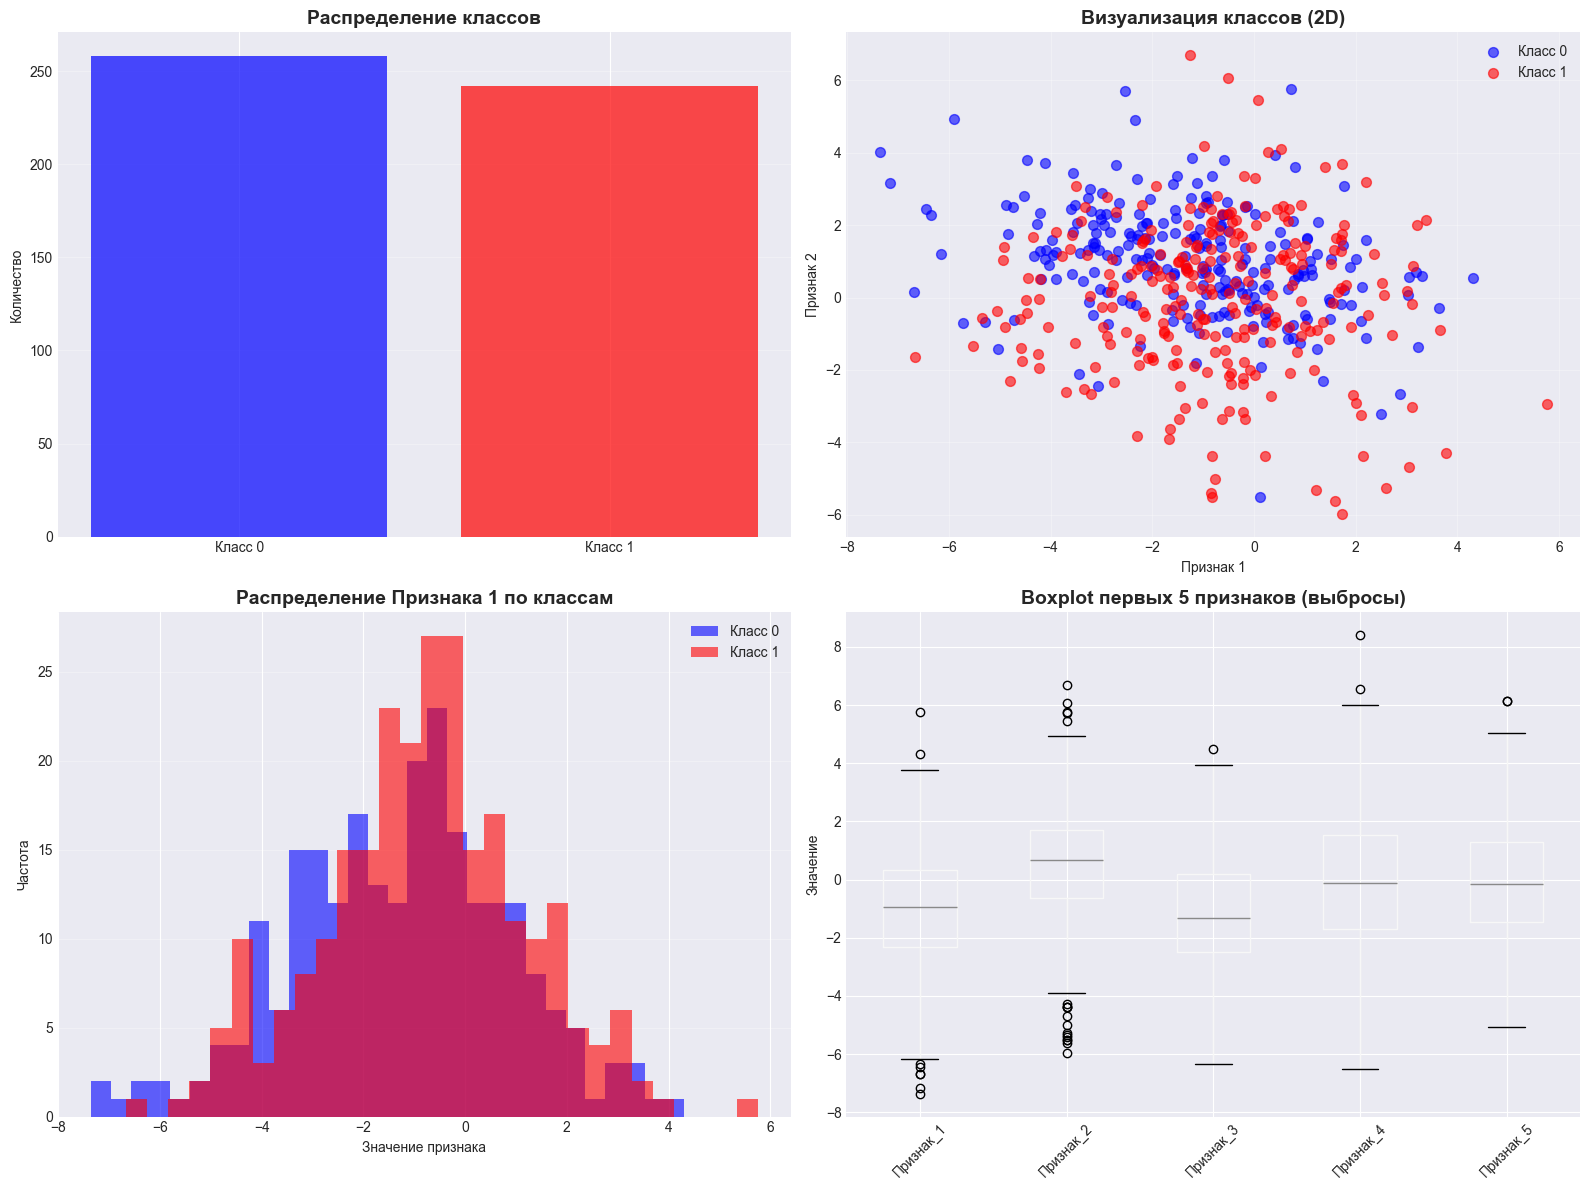

In [2]:
# Пример бинарной классификации
from sklearn.datasets import make_classification

# Создаем синтетические данные для бинарной классификации
X_binary, y_binary = make_classification(
    n_samples=500,
    n_features=10,
    n_informative=8,
    n_redundant=2,
    n_clusters_per_class=2,
    random_state=42,
    flip_y=0.1  # 10% шума
)

# Создаем DataFrame для удобства
feature_names = [f'Признак_{i+1}' for i in range(X_binary.shape[1])]
df_binary = pd.DataFrame(X_binary, columns=feature_names)
df_binary['Целевая'] = y_binary

print("="*60)
print("ПЕРВИЧНЫЙ АНАЛИЗ ДАННЫХ (EDA) - БИНАРНАЯ КЛАССИФИКАЦИЯ")
print("="*60)

# 1. Общая информация
print("\n1. ОБЩАЯ ИНФОРМАЦИЯ О ДАННЫХ:")
print(f"   Размер датасета: {df_binary.shape[0]} строк, {df_binary.shape[1]} столбцов")
print(f"   Количество признаков: {X_binary.shape[1]}")
print(f"\n   Первые 5 строк:")
print(df_binary.head())

# 2. Статистика
print("\n2. СТАТИСТИЧЕСКОЕ ОПИСАНИЕ:")
print(df_binary.describe())

# 3. Пропущенные значения
print("\n3. ПРОПУЩЕННЫЕ ЗНАЧЕНИЯ:")
missing = df_binary.isnull().sum()
print(f"   Всего пропусков: {missing.sum()}")

# 4. Распределение классов
print("\n4. РАСПРЕДЕЛЕНИЕ ЦЕЛЕВОЙ ПЕРЕМЕННОЙ:")
class_counts = df_binary['Целевая'].value_counts()
print(class_counts)
print(f"   Класс 0: {class_counts[0]} ({class_counts[0]/len(df_binary)*100:.1f}%)")
print(f"   Класс 1: {class_counts[1]} ({class_counts[1]/len(df_binary)*100:.1f}%)")
print(f"   Баланс классов: {'Сбалансирован' if abs(class_counts[0] - class_counts[1]) < 50 else 'Несбалансирован'}")

# Визуализация
fig, axes = plt.subplots(2, 2, figsize=(16, 12))

# График 1: Распределение классов
axes[0, 0].bar(['Класс 0', 'Класс 1'], class_counts.values, color=['blue', 'red'], alpha=0.7)
axes[0, 0].set_title('Распределение классов', fontsize=14, fontweight='bold')
axes[0, 0].set_ylabel('Количество')
axes[0, 0].grid(axis='y', alpha=0.3)

# График 2: Scatter plot первых двух признаков
axes[0, 1].scatter(X_binary[y_binary==0][:, 0], X_binary[y_binary==0][:, 1], 
                   c='blue', label='Класс 0', alpha=0.6, s=50)
axes[0, 1].scatter(X_binary[y_binary==1][:, 0], X_binary[y_binary==1][:, 1], 
                   c='red', label='Класс 1', alpha=0.6, s=50)
axes[0, 1].set_xlabel('Признак 1')
axes[0, 1].set_ylabel('Признак 2')
axes[0, 1].set_title('Визуализация классов (2D)', fontsize=14, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(True, alpha=0.3)

# График 3: Распределение первого признака
axes[1, 0].hist(X_binary[y_binary==0][:, 0], bins=30, alpha=0.6, label='Класс 0', color='blue')
axes[1, 0].hist(X_binary[y_binary==1][:, 0], bins=30, alpha=0.6, label='Класс 1', color='red')
axes[1, 0].set_xlabel('Значение признака')
axes[1, 0].set_ylabel('Частота')
axes[1, 0].set_title('Распределение Признака 1 по классам', fontsize=14, fontweight='bold')
axes[1, 0].legend()
axes[1, 0].grid(axis='y', alpha=0.3)

# График 4: Boxplot для выявления выбросов
df_binary.boxplot(column=feature_names[:5], ax=axes[1, 1])
axes[1, 1].set_title('Boxplot первых 5 признаков (выбросы)', fontsize=14, fontweight='bold')
axes[1, 1].set_ylabel('Значение')
axes[1, 1].tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

print("\n" + "="*60)

### 2.2 Мультикласс классификация

Более двух классов, но объект принадлежит **только одному** классу

![Multiclass](https://miro.medium.com/max/1400/1*2xHm0V8Q8Aw8Qqr8Yx3Yvg.png)

**Примеры:**
- Распознавание цифр (0-9)
- Классификация видов цветов
- Определение языка текста

Датасет Iris:
Количество образцов: 150
Количество признаков: 4
Классы: ['setosa' 'versicolor' 'virginica']
Названия признаков: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


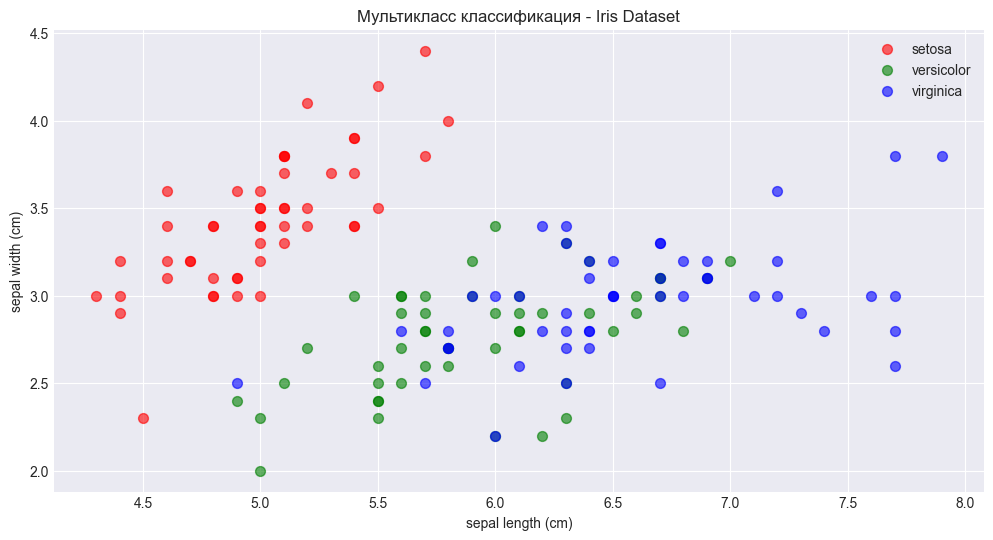

In [3]:
# Пример мультикласс классификации - датасет Iris
from sklearn.datasets import load_iris

# Загружаем датасет Iris (3 класса цветов)
iris = load_iris()
X_multi = iris.data
y_multi = iris.target

print("Датасет Iris:")
print(f"Количество образцов: {X_multi.shape[0]}")
print(f"Количество признаков: {X_multi.shape[1]}")
print(f"Классы: {iris.target_names}")
print(f"Названия признаков: {iris.feature_names}")

# Визуализация первых двух признаков
plt.figure(figsize=(12, 6))
colors = ['red', 'green', 'blue']
for i, color in enumerate(colors):
    plt.scatter(X_multi[y_multi==i, 0], X_multi[y_multi==i, 1],
                c=color, label=iris.target_names[i], alpha=0.6, s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Мультикласс классификация - Iris Dataset')
plt.legend()
plt.grid(True)
plt.show()

### 2.3 Мультилейбл классификация

Объект может принадлежать **нескольким классам одновременно**

![Multilabel](https://miro.medium.com/max/1400/1*xYz5H0q8VqKqKqKqKqKqKw.png)

**Примеры:**
- Теги для статей (технологии, наука, образование)
- Жанры фильмов (боевик, комедия, драма)
- Медицинская диагностика (несколько заболеваний одновременно)

In [4]:
# Пример мультилейбл классификации
from sklearn.datasets import make_multilabel_classification
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

# Создаем синтетические данные для мультилейбл классификации
X_multilabel, y_multilabel = make_multilabel_classification(
    n_samples=200,
    n_features=10,
    n_classes=3,
    n_labels=2,
    random_state=42
)

print("Мультилейбл классификация:")
print(f"Форма X: {X_multilabel.shape}")
print(f"Форма y: {y_multilabel.shape}")
print(f"\nПримеры меток (первые 5 образцов):")
print(y_multilabel[:5])
print("\nКаждая строка - это набор меток для одного объекта")
print("1 означает, что объект принадлежит этому классу")
print("0 означает, что объект не принадлежит этому классу")

# Разделение данных
X_train_ml, X_test_ml, y_train_ml, y_test_ml = train_test_split(
    X_multilabel, y_multilabel, test_size=0.3, random_state=42
)

# Обучение модели для мультилейбл классификации
multilabel_model = MultiOutputClassifier(RandomForestClassifier(n_estimators=50, random_state=42))
multilabel_model.fit(X_train_ml, y_train_ml)

# Предсказание
y_pred_ml = multilabel_model.predict(X_test_ml)

print(f"\nТочность модели: {accuracy_score(y_test_ml, y_pred_ml):.3f}")
print(f"\nПримеры предсказаний:")
for i in range(3):
    print(f"Истинные метки: {y_test_ml[i]}, Предсказанные: {y_pred_ml[i]}")

Мультилейбл классификация:
Форма X: (200, 10)
Форма y: (200, 3)

Примеры меток (первые 5 образцов):
[[1 1 0]
 [1 1 0]
 [0 0 1]
 [1 1 1]
 [0 1 0]]

Каждая строка - это набор меток для одного объекта
1 означает, что объект принадлежит этому классу
0 означает, что объект не принадлежит этому классу

Точность модели: 0.567

Примеры предсказаний:
Истинные метки: [0 0 1], Предсказанные: [0 0 1]
Истинные метки: [1 0 0], Предсказанные: [1 0 0]
Истинные метки: [1 1 0], Предсказанные: [1 1 1]


---
## 3. Работа с категориальными признаками

Категориальные признаки - это признаки, которые принимают ограниченное количество значений (категорий)

![Categorical Features](https://miro.medium.com/max/1400/1*pLI5hNe_Gy8qlhqKqKqKqw.png)

### Типы категориальных признаков:
1. **Номинальные** - нет порядка (цвет, страна, пол)
2. **Порядковые** - есть порядок (размер: S, M, L, XL)

In [5]:
# Создаем пример датасета с категориальными признаками
data = {
    'Возраст': [25, 30, 35, 40, 28, 33, 45, 50, 22, 38],
    'Пол': ['М', 'Ж', 'М', 'Ж', 'М', 'Ж', 'М', 'Ж', 'М', 'Ж'],
    'Город': ['Москва', 'СПб', 'Москва', 'Казань', 'СПб', 'Москва', 'Казань', 'СПб', 'Москва', 'Казань'],
    'Образование': ['Высшее', 'Среднее', 'Высшее', 'Высшее', 'Среднее', 'Высшее', 'Среднее', 'Высшее', 'Среднее', 'Высшее'],
    'Зарплата': [50000, 40000, 60000, 55000, 45000, 65000, 48000, 70000, 38000, 58000],
    'Купил_продукт': [1, 0, 1, 1, 0, 1, 0, 1, 0, 1]
}

df = pd.DataFrame(data)
print("Исходный датасет:")
print(df)
print(f"\nТипы данных:\n{df.dtypes}")

Исходный датасет:
   Возраст Пол   Город Образование  Зарплата  Купил_продукт
0       25   М  Москва      Высшее     50000              1
1       30   Ж     СПб     Среднее     40000              0
2       35   М  Москва      Высшее     60000              1
3       40   Ж  Казань      Высшее     55000              1
4       28   М     СПб     Среднее     45000              0
5       33   Ж  Москва      Высшее     65000              1
6       45   М  Казань     Среднее     48000              0
7       50   Ж     СПб      Высшее     70000              1
8       22   М  Москва     Среднее     38000              0
9       38   Ж  Казань      Высшее     58000              1

Типы данных:
Возраст           int64
Пол              object
Город            object
Образование      object
Зарплата          int64
Купил_продукт     int64
dtype: object


### 3.1 Label Encoding

Преобразование категорий в числа (0, 1, 2, ...)

**Подходит для:** порядковых признаков

In [6]:
# Label Encoding для признака 'Пол'
from sklearn.preprocessing import LabelEncoder

df_encoded = df.copy()
le_gender = LabelEncoder()
df_encoded['Пол_encoded'] = le_gender.fit_transform(df_encoded['Пол'])

print("Label Encoding для признака 'Пол':")
print(df_encoded[['Пол', 'Пол_encoded']])
print(f"\nСоответствие: {dict(zip(le_gender.classes_, le_gender.transform(le_gender.classes_)))}")

Label Encoding для признака 'Пол':
  Пол  Пол_encoded
0   М            1
1   Ж            0
2   М            1
3   Ж            0
4   М            1
5   Ж            0
6   М            1
7   Ж            0
8   М            1
9   Ж            0

Соответствие: {'Ж': np.int64(0), 'М': np.int64(1)}


### 3.2 One-Hot Encoding

Создание бинарных столбцов для каждой категории

![One-Hot Encoding](https://miro.medium.com/max/1400/1*ggtP4a5Vkc-rfVDNv6z1Qg.png)

**Подходит для:** номинальных признаков

In [7]:
# One-Hot Encoding для признака 'Город'
df_onehot = pd.get_dummies(df, columns=['Город', 'Образование'], prefix=['Город', 'Образование'])

print("One-Hot Encoding:")
print(df_onehot.head())
print(f"\nКоличество столбцов до: {df.shape[1]}")
print(f"Количество столбцов после: {df_onehot.shape[1]}")

One-Hot Encoding:
   Возраст Пол  Зарплата  Купил_продукт  Город_Казань  Город_Москва  \
0       25   М     50000              1         False          True   
1       30   Ж     40000              0         False         False   
2       35   М     60000              1         False          True   
3       40   Ж     55000              1          True         False   
4       28   М     45000              0         False         False   

   Город_СПб  Образование_Высшее  Образование_Среднее  
0      False                True                False  
1       True               False                 True  
2      False                True                False  
3      False                True                False  
4       True               False                 True  

Количество столбцов до: 6
Количество столбцов после: 9


---
## 4. Feature Engineering для классификации

**Feature Engineering** - процесс создания новых признаков из существующих для улучшения качества модели

![Feature Engineering](https://miro.medium.com/max/1400/1*qWNKqKqKqKqKqKqKqKqKqw.png)

### Основные техники:
1. Создание новых признаков
2. Преобразование признаков
3. Масштабирование
4. Отбор признаков

Feature Engineering:
   Возраст Возраст_группа  Зарплата  Зарплата_на_возраст  Высокая_зарплата
0       25        Молодой     50000          2000.000000                 0
1       30        Молодой     40000          1333.333333                 0
2       35        Средний     60000          1714.285714                 1
3       40        Средний     55000          1375.000000                 1
4       28        Молодой     45000          1607.142857                 0


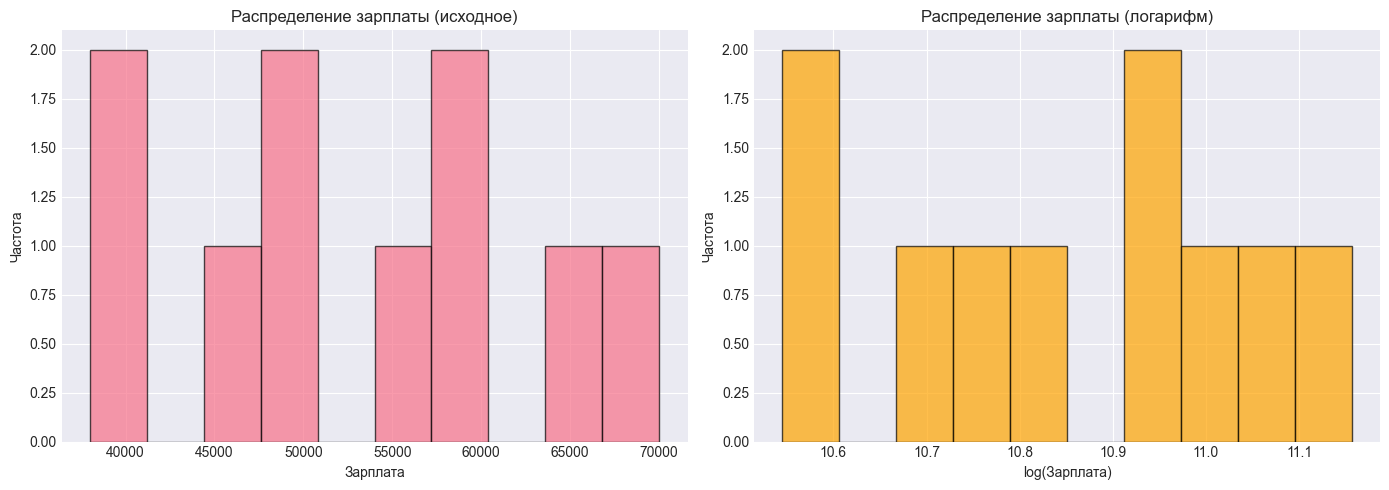

In [8]:
# Feature Engineering на примере
df_fe = df.copy()

# 1. Создание новых признаков
df_fe['Возраст_группа'] = pd.cut(df_fe['Возраст'], bins=[0, 30, 40, 100], labels=['Молодой', 'Средний', 'Старший'])
df_fe['Зарплата_на_возраст'] = df_fe['Зарплата'] / df_fe['Возраст']

# 2. Логарифмическое преобразование
df_fe['Зарплата_log'] = np.log1p(df_fe['Зарплата'])

# 3. Бинарные признаки
df_fe['Высокая_зарплата'] = (df_fe['Зарплата'] > df_fe['Зарплата'].median()).astype(int)

print("Feature Engineering:")
print(df_fe[['Возраст', 'Возраст_группа', 'Зарплата', 'Зарплата_на_возраст', 'Высокая_зарплата']].head())

# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

axes[0].hist(df_fe['Зарплата'], bins=10, edgecolor='black', alpha=0.7)
axes[0].set_title('Распределение зарплаты (исходное)')
axes[0].set_xlabel('Зарплата')
axes[0].set_ylabel('Частота')

axes[1].hist(df_fe['Зарплата_log'], bins=10, edgecolor='black', alpha=0.7, color='orange')
axes[1].set_title('Распределение зарплаты (логарифм)')
axes[1].set_xlabel('log(Зарплата)')
axes[1].set_ylabel('Частота')

plt.tight_layout()
plt.show()

### 4.1 Масштабирование признаков

Приведение признаков к одному масштабу - важно для многих алгоритмов (особенно KNN, SVM, нейронные сети)

![Feature Scaling](https://miro.medium.com/max/1400/1*9e3qKqKqKqKqKqKqKqKqKw.png)

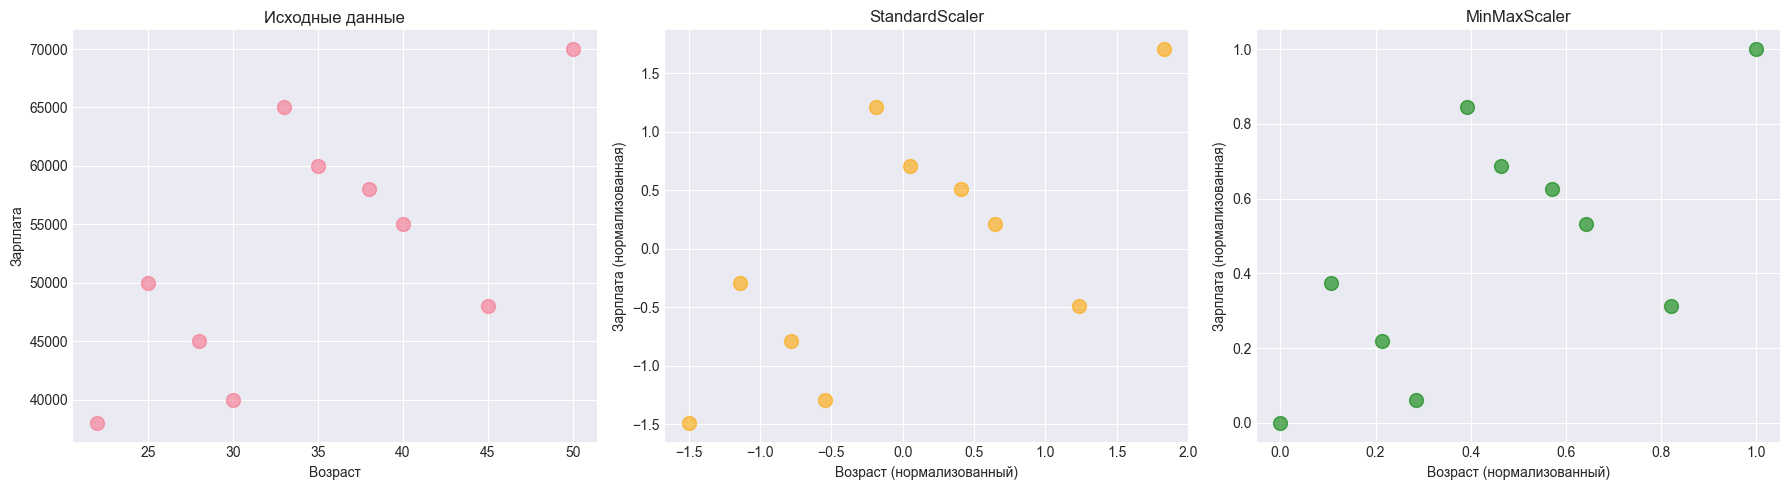

Статистика исходных данных:
Возраст: mean=34.60, std=8.39
Зарплата: mean=52900.00, std=10014.49

Статистика после StandardScaler:
Возраст: mean=-0.00, std=1.00
Зарплата: mean=0.00, std=1.00


In [9]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler

# Подготовка данных
X_scale = df[['Возраст', 'Зарплата']].values

# StandardScaler (z-score нормализация)
scaler_standard = StandardScaler()
X_standard = scaler_standard.fit_transform(X_scale)

# MinMaxScaler (нормализация в диапазон [0, 1])
scaler_minmax = MinMaxScaler()
X_minmax = scaler_minmax.fit_transform(X_scale)

# Визуализация
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

axes[0].scatter(X_scale[:, 0], X_scale[:, 1], alpha=0.6, s=100)
axes[0].set_title('Исходные данные')
axes[0].set_xlabel('Возраст')
axes[0].set_ylabel('Зарплата')
axes[0].grid(True)

axes[1].scatter(X_standard[:, 0], X_standard[:, 1], alpha=0.6, s=100, color='orange')
axes[1].set_title('StandardScaler')
axes[1].set_xlabel('Возраст (нормализованный)')
axes[1].set_ylabel('Зарплата (нормализованная)')
axes[1].grid(True)

axes[2].scatter(X_minmax[:, 0], X_minmax[:, 1], alpha=0.6, s=100, color='green')
axes[2].set_title('MinMaxScaler')
axes[2].set_xlabel('Возраст (нормализованный)')
axes[2].set_ylabel('Зарплата (нормализованная)')
axes[2].grid(True)

plt.tight_layout()
plt.show()

print("Статистика исходных данных:")
print(f"Возраст: mean={X_scale[:, 0].mean():.2f}, std={X_scale[:, 0].std():.2f}")
print(f"Зарплата: mean={X_scale[:, 1].mean():.2f}, std={X_scale[:, 1].std():.2f}")
print("\nСтатистика после StandardScaler:")
print(f"Возраст: mean={X_standard[:, 0].mean():.2f}, std={X_standard[:, 0].std():.2f}")
print(f"Зарплата: mean={X_standard[:, 1].mean():.2f}, std={X_standard[:, 1].std():.2f}")

---
## 5. Алгоритм K-Nearest Neighbors (KNN)

**KNN** - простой и интуитивный алгоритм классификации

![KNN Algorithm](https://miro.medium.com/max/1400/1*wW8O-0xVQUFhBGexx2B6hg.png)

### Принцип работы:
1. Выбираем количество соседей K
2. Находим K ближайших соседей к новому объекту
3. Определяем класс по большинству голосов

### Метрики расстояния:
- **Евклидово расстояние**: $\sqrt{\sum_{i=1}^{n}(x_i - y_i)^2}$
- **Манхэттенское расстояние**: $\sum_{i=1}^{n}|x_i - y_i|$

In [10]:
# Реализация KNN на датасете Iris
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Загружаем данные
iris = load_iris()
X = iris.data
y = iris.target

# Разделяем на train и test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Размер обучающей выборки: {X_train.shape[0]}")
print(f"Размер тестовой выборки: {X_test.shape[0]}")

# Масштабирование данных (важно для KNN!)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Обучение модели KNN
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train_scaled, y_train)

# Предсказание
y_pred = knn.predict(X_test_scaled)

# Оценка модели
accuracy = accuracy_score(y_test, y_pred)
print(f"\nТочность модели KNN (K=5): {accuracy:.3f}")
print(f"\nОтчет по классификации:\n{classification_report(y_test, y_pred, target_names=iris.target_names)}")

Размер обучающей выборки: 105
Размер тестовой выборки: 45

Точность модели KNN (K=5): 1.000

Отчет по классификации:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00        13

    accuracy                           1.00        45
   macro avg       1.00      1.00      1.00        45
weighted avg       1.00      1.00      1.00        45



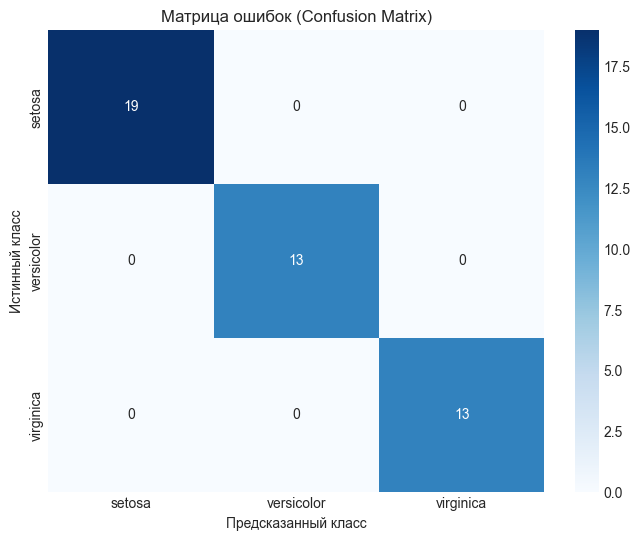

In [11]:
# Визуализация матрицы ошибок
cm = confusion_matrix(y_test, y_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=iris.target_names, 
            yticklabels=iris.target_names)
plt.title('Матрица ошибок (Confusion Matrix)')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

### 5.1 Выбор оптимального K

Важно выбрать правильное значение K:
- **Маленькое K** (1-3): модель чувствительна к шуму, переобучение
- **Большое K**: модель слишком простая, недообучение

![K Selection](https://miro.medium.com/max/1400/1*jqKqKqKqKqKqKqKqKqKqKw.png)

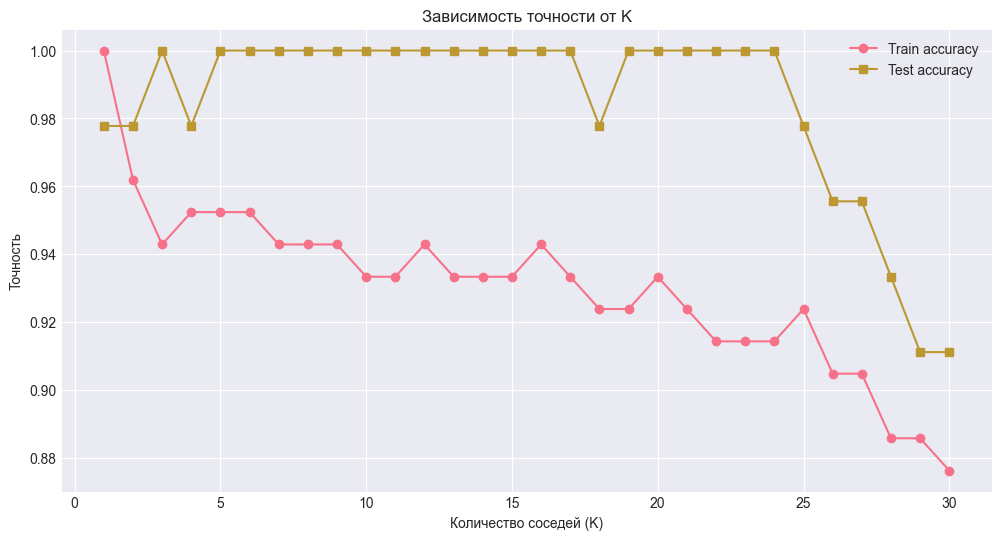

Оптимальное значение K: 3
Максимальная точность на тесте: 1.000


In [12]:
# Поиск оптимального K
k_values = range(1, 31)
train_scores = []
test_scores = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    
    train_scores.append(knn.score(X_train_scaled, y_train))
    test_scores.append(knn.score(X_test_scaled, y_test))

# Визуализация
plt.figure(figsize=(12, 6))
plt.plot(k_values, train_scores, label='Train accuracy', marker='o')
plt.plot(k_values, test_scores, label='Test accuracy', marker='s')
plt.xlabel('Количество соседей (K)')
plt.ylabel('Точность')
plt.title('Зависимость точности от K')
plt.legend()
plt.grid(True)
plt.show()

best_k = k_values[np.argmax(test_scores)]
print(f"Оптимальное значение K: {best_k}")
print(f"Максимальная точность на тесте: {max(test_scores):.3f}")

---
## 6. Процесс обучения модели

### 6.1 Что такое обучение?

**Обучение** - процесс настройки параметров модели для минимизации ошибки

![Training Process](https://miro.medium.com/max/1400/1*5fqKqKqKqKqKqKqKqKqKqw.png)

### Основные концепции:
1. **Функция потерь (Loss Function)** - измеряет ошибку модели
2. **Эпоха (Epoch)** - один полный проход по всему датасету
3. **Батч (Batch)** - подмножество данных для одного шага обучения
4. **Градиентный спуск** - метод оптимизации параметров

### 6.2 Эпохи обучения

**Эпоха** - это один полный проход по всем обучающим данным

![Epochs](https://miro.medium.com/max/1400/1*7qKqKqKqKqKqKqKqKqKqKw.png)

**Зачем нужно несколько эпох?**
- Модель учится постепенно
- Каждая эпоха улучшает веса модели
- Слишком много эпох → переобучение
- Слишком мало эпох → недообучение

Процесс обучения:
Эпоха | Train Loss | Test Accuracy
----------------------------------------
   10 |     0.3086 |        0.6200
   20 |     0.3086 |        0.6733
   30 |     0.3257 |        0.6133
   40 |     0.3171 |        0.5600
   50 |     0.3171 |        0.6200


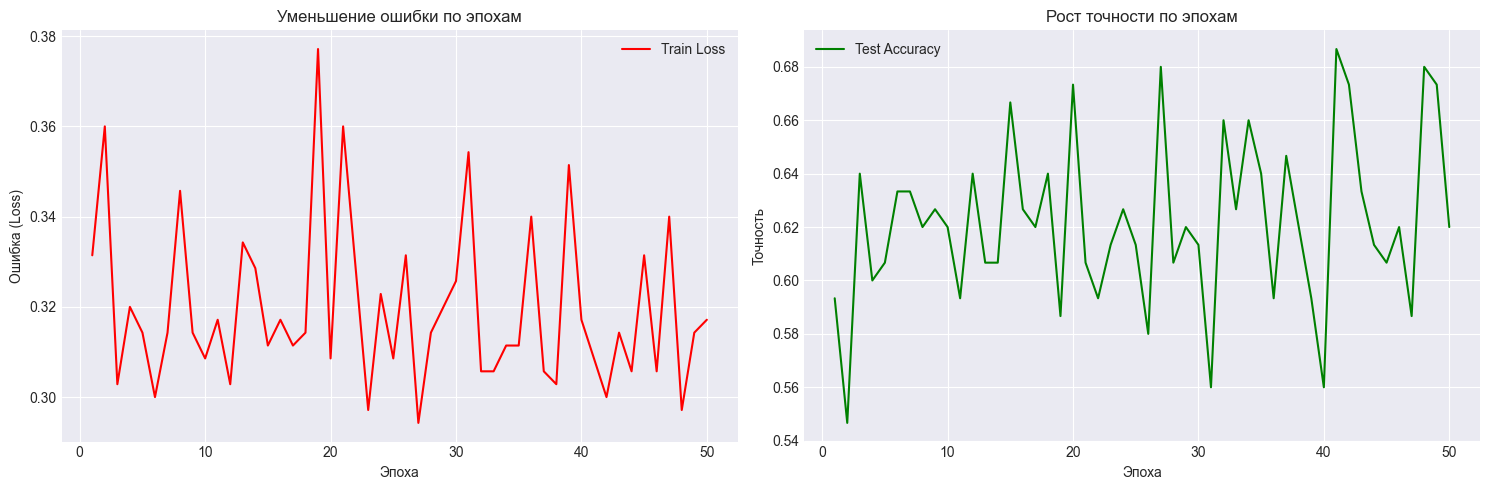

In [13]:
# Демонстрация процесса обучения с эпохами
from sklearn.linear_model import SGDClassifier
import warnings
warnings.filterwarnings('ignore')

# Подготовка данных
X_train_demo, X_test_demo, y_train_demo, y_test_demo = train_test_split(
    X_binary, y_binary, test_size=0.3, random_state=42
)

scaler_demo = StandardScaler()
X_train_demo_scaled = scaler_demo.fit_transform(X_train_demo)
X_test_demo_scaled = scaler_demo.transform(X_test_demo)

# Обучение с отслеживанием прогресса по эпохам
n_epochs = 50
train_losses = []
test_accuracies = []

model = SGDClassifier(loss='log_loss', random_state=42, max_iter=1, warm_start=True)

print("Процесс обучения:")
print("Эпоха | Train Loss | Test Accuracy")
print("-" * 40)

for epoch in range(n_epochs):
    # Обучение на одной эпохе
    model.fit(X_train_demo_scaled, y_train_demo)
    
    # Вычисление метрик
    train_pred = model.predict(X_train_demo_scaled)
    test_pred = model.predict(X_test_demo_scaled)
    
    train_loss = 1 - accuracy_score(y_train_demo, train_pred)
    test_acc = accuracy_score(y_test_demo, test_pred)
    
    train_losses.append(train_loss)
    test_accuracies.append(test_acc)
    
    if (epoch + 1) % 10 == 0:
        print(f"{epoch+1:5d} | {train_loss:10.4f} | {test_acc:13.4f}")

# Визуализация процесса обучения
fig, axes = plt.subplots(1, 2, figsize=(15, 5))

axes[0].plot(range(1, n_epochs+1), train_losses, label='Train Loss', color='red')
axes[0].set_xlabel('Эпоха')
axes[0].set_ylabel('Ошибка (Loss)')
axes[0].set_title('Уменьшение ошибки по эпохам')
axes[0].legend()
axes[0].grid(True)

axes[1].plot(range(1, n_epochs+1), test_accuracies, label='Test Accuracy', color='green')
axes[1].set_xlabel('Эпоха')
axes[1].set_ylabel('Точность')
axes[1].set_title('Рост точности по эпохам')
axes[1].legend()
axes[1].grid(True)

plt.tight_layout()
plt.show()

### 6.3 Батчи (Batch) и градиентный спуск

**Батч** - подмножество данных, используемое для одного обновления весов

![Batch Training](https://miro.medium.com/max/1400/1*8qKqKqKqKqKqKqKqKqKqKw.png)

### Типы градиентного спуска:
1. **Batch Gradient Descent** - использует все данные
2. **Stochastic Gradient Descent (SGD)** - использует 1 образец
3. **Mini-Batch Gradient Descent** - использует небольшие батчи (обычно 32, 64, 128)

### Градиентный спуск:
$$\theta_{new} = \theta_{old} - \alpha \cdot \nabla L(\theta)$$

где:
- $\theta$ - параметры модели
- $\alpha$ - learning rate (скорость обучения)
- $\nabla L$ - градиент функции потерь

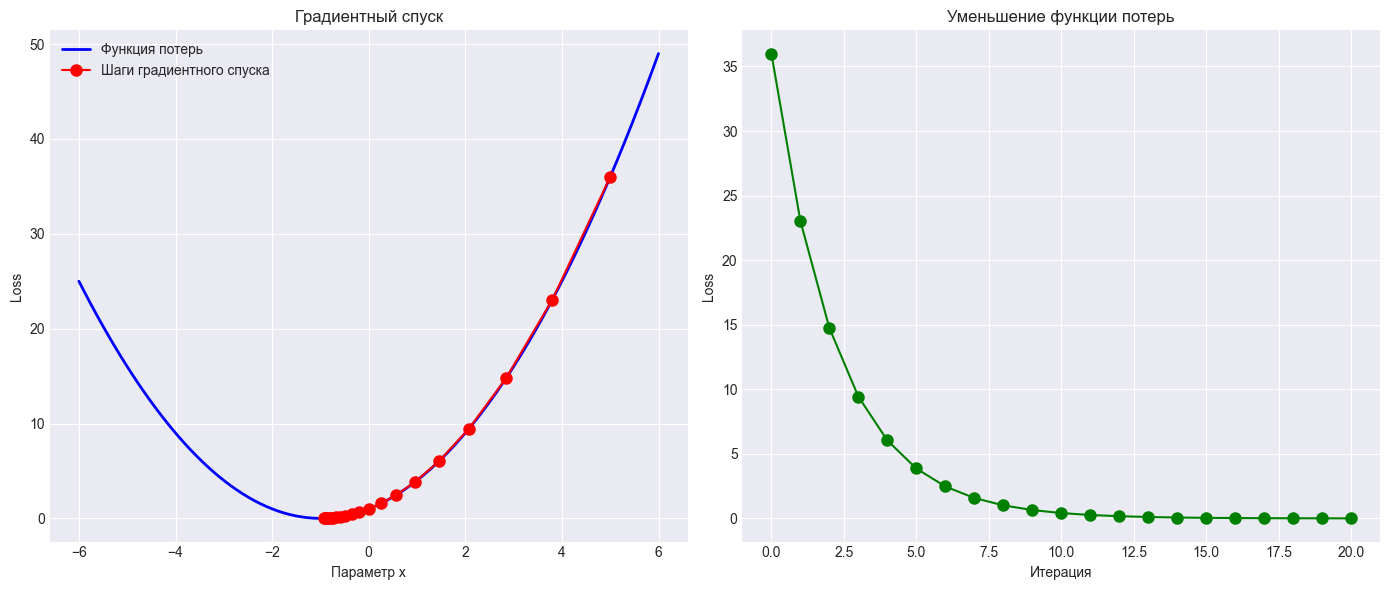

Начальное значение: x=5, loss=36.0000
Конечное значение: x=-0.9308, loss=0.0048
Оптимальное значение: x=-1, loss=0.0000


In [14]:
# Визуализация градиентного спуска
def loss_function(x):
    return x**2 + 2*x + 1

def gradient(x):
    return 2*x + 2

# Градиентный спуск
x_start = 5
learning_rate = 0.1
n_iterations = 20

x_history = [x_start]
loss_history = [loss_function(x_start)]

x = x_start
for i in range(n_iterations):
    grad = gradient(x)
    x = x - learning_rate * grad
    x_history.append(x)
    loss_history.append(loss_function(x))

# Визуализация
x_range = np.linspace(-6, 6, 100)
y_range = loss_function(x_range)

plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(x_range, y_range, 'b-', linewidth=2, label='Функция потерь')
plt.plot(x_history, loss_history, 'ro-', markersize=8, label='Шаги градиентного спуска')
plt.xlabel('Параметр x')
plt.ylabel('Loss')
plt.title('Градиентный спуск')
plt.legend()
plt.grid(True)

plt.subplot(1, 2, 2)
plt.plot(range(len(loss_history)), loss_history, 'go-', markersize=8)
plt.xlabel('Итерация')
plt.ylabel('Loss')
plt.title('Уменьшение функции потерь')
plt.grid(True)

plt.tight_layout()
plt.show()

print(f"Начальное значение: x={x_start}, loss={loss_function(x_start):.4f}")
print(f"Конечное значение: x={x_history[-1]:.4f}, loss={loss_history[-1]:.4f}")
print(f"Оптимальное значение: x=-1, loss={loss_function(-1):.4f}")

---
## 7. Полный пример: Классификация с обучением модели

Создадим полный пайплайн классификации от начала до конца

In [15]:
# Создаем более сложный датасет
from sklearn.datasets import make_classification

X_full, y_full = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=15,
    n_redundant=5,
    n_classes=3,
    n_clusters_per_class=2,
    random_state=42
)

print("Датасет создан:")
print(f"Количество образцов: {X_full.shape[0]}")
print(f"Количество признаков: {X_full.shape[1]}")
print(f"Количество классов: {len(np.unique(y_full))}")
print(f"Распределение классов: {np.bincount(y_full)}")

Датасет создан:
Количество образцов: 1000
Количество признаков: 20
Количество классов: 3
Распределение классов: [333 331 336]


In [16]:
# Шаг 1: Разделение данных
X_train_full, X_test_full, y_train_full, y_test_full = train_test_split(
    X_full, y_full, test_size=0.2, random_state=42, stratify=y_full
)

print("Разделение данных:")
print(f"Train: {X_train_full.shape[0]} образцов")
print(f"Test: {X_test_full.shape[0]} образцов")
print(f"Распределение классов в train: {np.bincount(y_train_full)}")
print(f"Распределение классов в test: {np.bincount(y_test_full)}")

Разделение данных:
Train: 800 образцов
Test: 200 образцов
Распределение классов в train: [266 265 269]
Распределение классов в test: [67 66 67]


In [17]:
# Шаг 2: Масштабирование признаков
scaler_full = StandardScaler()
X_train_full_scaled = scaler_full.fit_transform(X_train_full)
X_test_full_scaled = scaler_full.transform(X_test_full)

print("Масштабирование выполнено")
print(f"Mean после масштабирования: {X_train_full_scaled.mean():.6f}")
print(f"Std после масштабирования: {X_train_full_scaled.std():.6f}")

Масштабирование выполнено
Mean после масштабирования: 0.000000
Std после масштабирования: 1.000000


In [18]:
# Шаг 3: Обучение нескольких моделей
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

models = {
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42),
    'SVM': SVC(kernel='rbf', random_state=42)
}

results = {}

print("Обучение моделей:\n")
print(f"{'Модель':<20} {'Train Accuracy':<15} {'Test Accuracy':<15}")
print("-" * 50)

for name, model in models.items():
    # Обучение
    model.fit(X_train_full_scaled, y_train_full)
    
    # Предсказания
    train_pred = model.predict(X_train_full_scaled)
    test_pred = model.predict(X_test_full_scaled)
    
    # Метрики
    train_acc = accuracy_score(y_train_full, train_pred)
    test_acc = accuracy_score(y_test_full, test_pred)
    
    results[name] = {'train': train_acc, 'test': test_acc}
    
    print(f"{name:<20} {train_acc:<15.4f} {test_acc:<15.4f}")

Обучение моделей:

Модель               Train Accuracy  Test Accuracy  
--------------------------------------------------
KNN                  0.9225          0.8900         
Logistic Regression  0.7000          0.6700         
Random Forest        1.0000          0.7850         
SVM                  0.9437          0.8850         


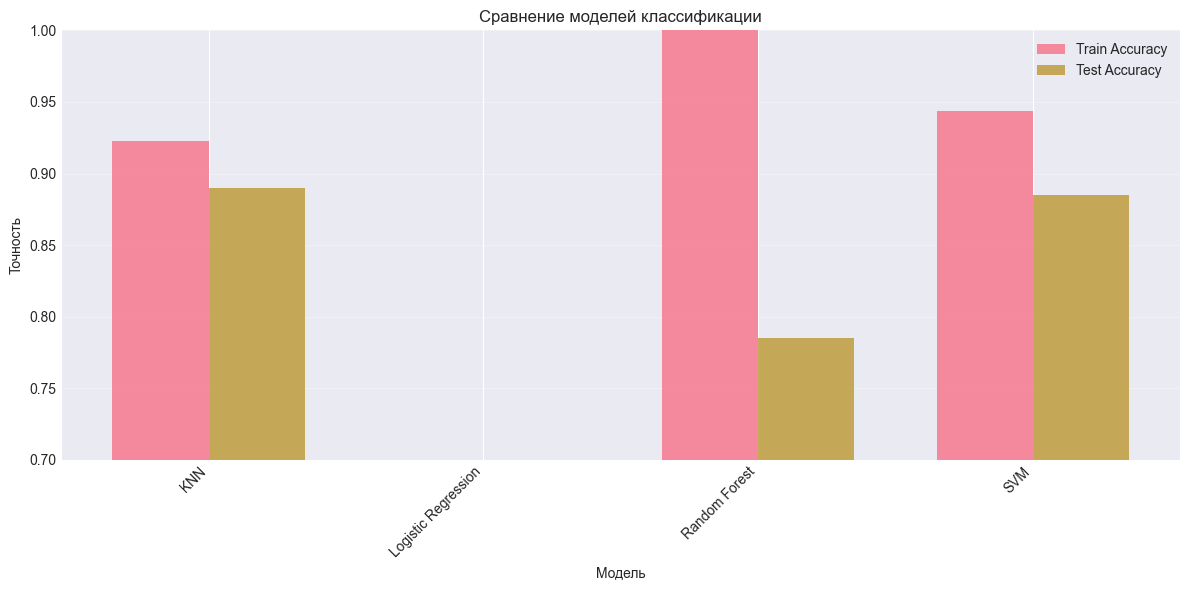

In [19]:
# Визуализация сравнения моделей
model_names = list(results.keys())
train_accs = [results[name]['train'] for name in model_names]
test_accs = [results[name]['test'] for name in model_names]

x_pos = np.arange(len(model_names))
width = 0.35

plt.figure(figsize=(12, 6))
plt.bar(x_pos - width/2, train_accs, width, label='Train Accuracy', alpha=0.8)
plt.bar(x_pos + width/2, test_accs, width, label='Test Accuracy', alpha=0.8)

plt.xlabel('Модель')
plt.ylabel('Точность')
plt.title('Сравнение моделей классификации')
plt.xticks(x_pos, model_names, rotation=45, ha='right')
plt.legend()
plt.ylim([0.7, 1.0])
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Лучшая модель: KNN
Test Accuracy: 0.8900

Classification Report:
              precision    recall  f1-score   support

     Класс 0       0.94      0.93      0.93        67
     Класс 1       0.88      0.91      0.90        66
     Класс 2       0.85      0.84      0.84        67

    accuracy                           0.89       200
   macro avg       0.89      0.89      0.89       200
weighted avg       0.89      0.89      0.89       200



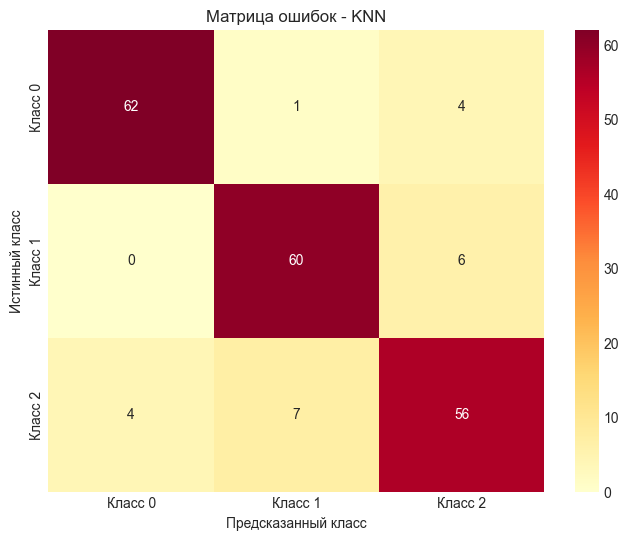

In [20]:
# Детальный анализ лучшей модели
best_model_name = max(results, key=lambda x: results[x]['test'])
best_model = models[best_model_name]

print(f"Лучшая модель: {best_model_name}")
print(f"Test Accuracy: {results[best_model_name]['test']:.4f}\n")

# Предсказания лучшей модели
y_pred_best = best_model.predict(X_test_full_scaled)

# Отчет по классификации
print("Classification Report:")
print(classification_report(y_test_full, y_pred_best, target_names=['Класс 0', 'Класс 1', 'Класс 2']))

# Матрица ошибок
cm_best = confusion_matrix(y_test_full, y_pred_best)

plt.figure(figsize=(8, 6))
sns.heatmap(cm_best, annot=True, fmt='d', cmap='YlOrRd', 
            xticklabels=['Класс 0', 'Класс 1', 'Класс 2'],
            yticklabels=['Класс 0', 'Класс 1', 'Класс 2'])
plt.title(f'Матрица ошибок - {best_model_name}')
plt.ylabel('Истинный класс')
plt.xlabel('Предсказанный класс')
plt.show()

---
## 8. Практическое задание

### Задание 1: Бинарная классификация
Создайте модель для предсказания, купит ли клиент продукт

In [21]:
# Создание датасета клиентов
np.random.seed(42)
n_customers = 500

customer_data = {
    'Возраст': np.random.randint(18, 70, n_customers),
    'Доход': np.random.randint(20000, 150000, n_customers),
    'Время_на_сайте': np.random.randint(1, 60, n_customers),
    'Предыдущие_покупки': np.random.randint(0, 20, n_customers),
    'Пол': np.random.choice(['М', 'Ж'], n_customers)
}

df_customers = pd.DataFrame(customer_data)

# Создаем целевую переменную (купил/не купил)
# Вероятность покупки зависит от признаков
purchase_prob = (
    0.3 * (df_customers['Доход'] / 150000) +
    0.3 * (df_customers['Время_на_сайте'] / 60) +
    0.4 * (df_customers['Предыдущие_покупки'] / 20)
)
df_customers['Купил'] = (purchase_prob + np.random.normal(0, 0.2, n_customers) > 0.5).astype(int)

print("Датасет клиентов:")
print(df_customers.head(10))
print(f"\nРаспределение целевой переменной:")
print(df_customers['Купил'].value_counts())

Датасет клиентов:
   Возраст   Доход  Время_на_сайте  Предыдущие_покупки Пол  Купил
0       56   23343              17                  16   М      0
1       69   33500               5                  19   Ж      0
2       46   73222              29                   7   Ж      0
3       32   49375               4                  16   М      0
4       60   29662              10                   6   М      1
5       25   36964              56                   0   Ж      0
6       38  133429              17                  12   Ж      1
7       56  141692              10                  18   Ж      1
8       36   79638              17                  18   Ж      1
9       40   93666              20                  16   М      1

Распределение целевой переменной:
Купил
0    255
1    245
Name: count, dtype: int64


In [22]:
# Подготовка данных
# 1. Кодирование категориального признака
df_customers_encoded = df_customers.copy()
df_customers_encoded['Пол'] = LabelEncoder().fit_transform(df_customers_encoded['Пол'])

# 2. Разделение на признаки и целевую переменную
X_customers = df_customers_encoded.drop('Купил', axis=1)
y_customers = df_customers_encoded['Купил']

# 3. Разделение на train/test
X_train_cust, X_test_cust, y_train_cust, y_test_cust = train_test_split(
    X_customers, y_customers, test_size=0.2, random_state=42
)

# 4. Масштабирование
scaler_cust = StandardScaler()
X_train_cust_scaled = scaler_cust.fit_transform(X_train_cust)
X_test_cust_scaled = scaler_cust.transform(X_test_cust)

print("Данные подготовлены для обучения")

Данные подготовлены для обучения


Результаты модели KNN:
Accuracy: 0.630

Classification Report:
              precision    recall  f1-score   support

    Не купил       0.65      0.56      0.60        50
       Купил       0.61      0.70      0.65        50

    accuracy                           0.63       100
   macro avg       0.63      0.63      0.63       100
weighted avg       0.63      0.63      0.63       100



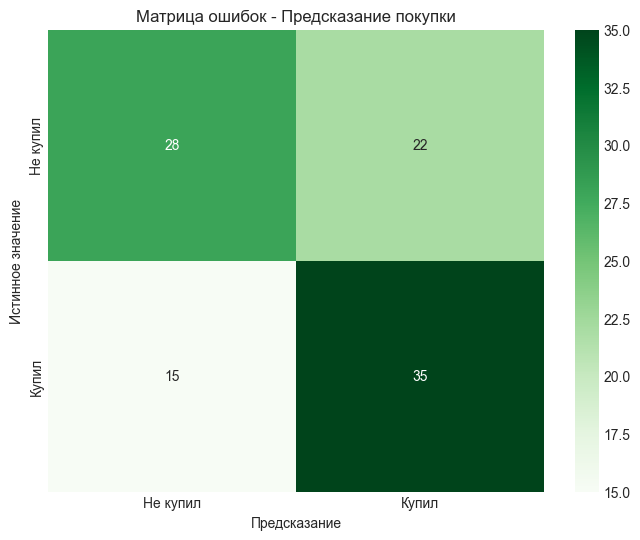

In [23]:
# Обучение модели KNN
knn_customer = KNeighborsClassifier(n_neighbors=7)
knn_customer.fit(X_train_cust_scaled, y_train_cust)

# Предсказания
y_pred_cust = knn_customer.predict(X_test_cust_scaled)

# Оценка
print("Результаты модели KNN:")
print(f"Accuracy: {accuracy_score(y_test_cust, y_pred_cust):.3f}")
print(f"\nClassification Report:\n{classification_report(y_test_cust, y_pred_cust, target_names=['Не купил', 'Купил'])}")

# Матрица ошибок
cm_cust = confusion_matrix(y_test_cust, y_pred_cust)
plt.figure(figsize=(8, 6))
sns.heatmap(cm_cust, annot=True, fmt='d', cmap='Greens',
            xticklabels=['Не купил', 'Купил'],
            yticklabels=['Не купил', 'Купил'])
plt.title('Матрица ошибок - Предсказание покупки')
plt.ylabel('Истинное значение')
plt.xlabel('Предсказание')
plt.show()

---
## 9. Матрицы корреляции и их интерпретация

**Корреляция** - статистическая взаимосвязь между признаками. Важна для понимания данных и отбора признаков.

![Correlation](https://miro.medium.com/max/1400/1*oNF6W0CQXg_SKMqU8xjZ7w.png)

### Коэффициент корреляции:
- **+1**: идеальная положительная корреляция
- **0**: нет корреляции
- **-1**: идеальная отрицательная корреляция

In [24]:
# Создаем датасет для демонстрации корреляции
np.random.seed(42)
n_samples = 200

# Создаем признаки с разными типами корреляции
x1 = np.random.randn(n_samples)
x2 = x1 + np.random.randn(n_samples) * 0.5  # Положительная корреляция
x3 = -x1 + np.random.randn(n_samples) * 0.5  # Отрицательная корреляция
x4 = np.random.randn(n_samples)  # Нет корреляции
x5 = x1**2 + np.random.randn(n_samples) * 0.3  # Нелинейная зависимость

df_corr = pd.DataFrame({
    'Признак_1': x1,
    'Признак_2_положит': x2,
    'Признак_3_отрицат': x3,
    'Признак_4_независ': x4,
    'Признак_5_нелинейн': x5
})

print("Датасет для анализа корреляции:")
print(df_corr.head())
print(f"\nРазмер датасета: {df_corr.shape}")

Датасет для анализа корреляции:
   Признак_1  Признак_2_положит  Признак_3_отрицат  Признак_4_независ  \
0   0.496714           0.675608          -1.293928           0.756989   
1  -0.138264           0.142128          -0.161423          -0.922165   
2   0.647689           1.189214          -0.645067           0.869606   
3   1.523030           2.049931          -1.499540           1.355638   
4  -0.234153          -0.922988           0.009121           0.413435   

   Признак_5_нелинейн  
0            0.528210  
1           -0.135696  
2            0.448337  
3            2.180937  
4           -0.075521  

Размер датасета: (200, 5)


### 9.1 Корреляция Пирсона (Pearson)

**Самый распространенный тип** - измеряет линейную зависимость между признаками

$$r = \\frac{\\sum(x_i - \\bar{x})(y_i - \\bar{y})}{\\sqrt{\\sum(x_i - \\bar{x})^2 \\sum(y_i - \\bar{y})^2}}$$

**Когда использовать:**
- Данные непрерывные
- Зависимость линейная
- Нет выбросов

Матрица корреляции Пирсона:
                    Признак_1  Признак_2_положит  Признак_3_отрицат  \
Признак_1               1.000              0.894             -0.897   
Признак_2_положит       0.894              1.000             -0.805   
Признак_3_отрицат      -0.897             -0.805              1.000   
Признак_4_независ       0.065              0.010             -0.007   
Признак_5_нелинейн      0.024             -0.047             -0.010   

                    Признак_4_независ  Признак_5_нелинейн  
Признак_1                       0.065               0.024  
Признак_2_положит               0.010              -0.047  
Признак_3_отрицат              -0.007              -0.010  
Признак_4_независ               1.000               0.034  
Признак_5_нелинейн              0.034               1.000  


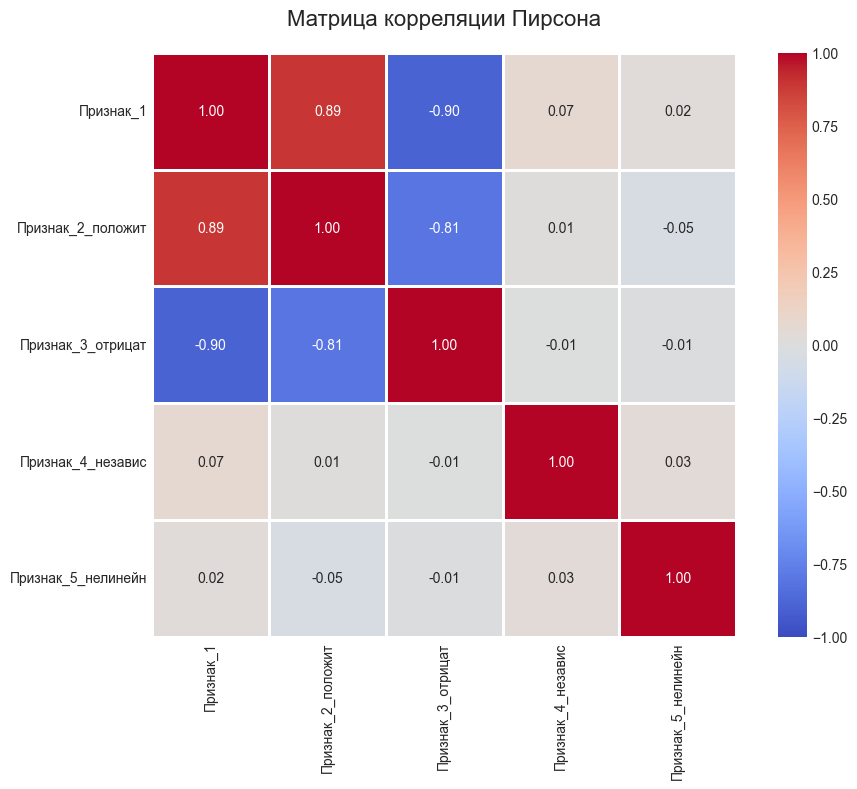


📊 Как читать матрицу Пирсона:
✓ Красный цвет (близко к +1): сильная положительная корреляция
  → Когда один признак растет, другой тоже растет
✓ Синий цвет (близко к -1): сильная отрицательная корреляция
  → Когда один признак растет, другой уменьшается
✓ Белый цвет (близко к 0): нет линейной связи
  → Признаки независимы друг от друга


In [25]:
# Корреляция Пирсона
corr_pearson = df_corr.corr(method='pearson')

print("Матрица корреляции Пирсона:")
print(corr_pearson.round(3))

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1)
plt.title('Матрица корреляции Пирсона', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Как читать матрицу Пирсона:")
print("✓ Красный цвет (близко к +1): сильная положительная корреляция")
print("  → Когда один признак растет, другой тоже растет")
print("✓ Синий цвет (близко к -1): сильная отрицательная корреляция")
print("  → Когда один признак растет, другой уменьшается")
print("✓ Белый цвет (близко к 0): нет линейной связи")
print("  → Признаки независимы друг от друга")

### 9.2 Корреляция Спирмена (Spearman)

**Ранговая корреляция** - измеряет монотонную зависимость (не обязательно линейную)

![Spearman](https://miro.medium.com/max/1400/1*hKqKqKqKqKqKqKqKqKqKqw.png)

**Когда использовать:**
- Данные порядковые (ранги)
- Зависимость нелинейная, но монотонная
- Есть выбросы
- Данные не нормально распределены

Матрица корреляции Спирмена:
                    Признак_1  Признак_2_положит  Признак_3_отрицат  \
Признак_1               1.000              0.889             -0.880   
Признак_2_положит       0.889              1.000             -0.811   
Признак_3_отрицат      -0.880             -0.811              1.000   
Признак_4_независ       0.058             -0.005             -0.001   
Признак_5_нелинейн     -0.089             -0.122              0.101   

                    Признак_4_независ  Признак_5_нелинейн  
Признак_1                       0.058              -0.089  
Признак_2_положит              -0.005              -0.122  
Признак_3_отрицат              -0.001               0.101  
Признак_4_независ               1.000               0.030  
Признак_5_нелинейн              0.030               1.000  


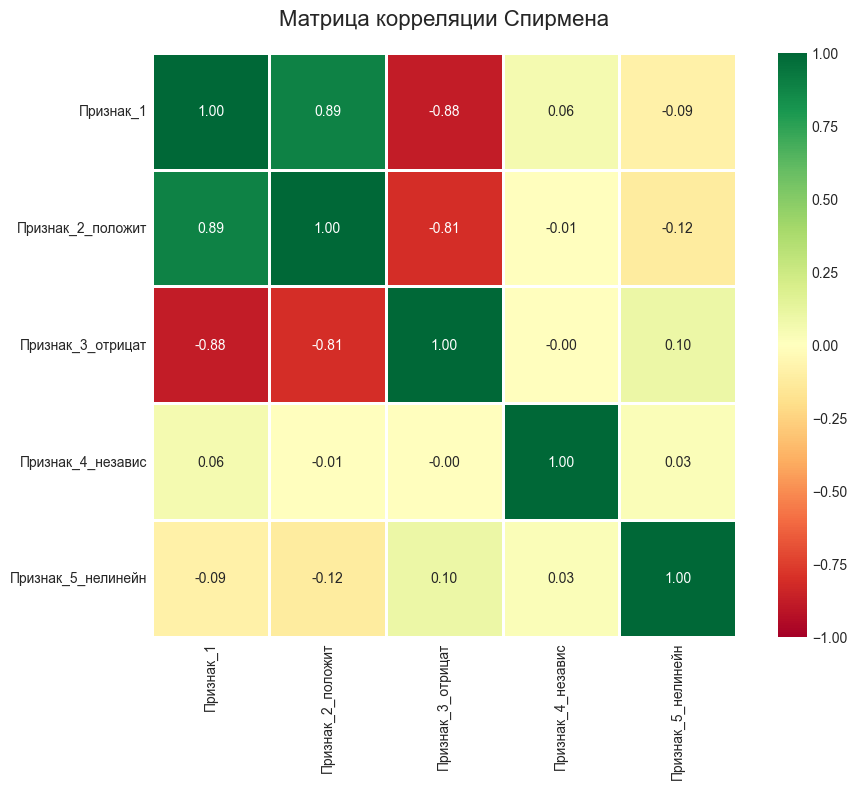


📊 Как читать матрицу Спирмена:
✓ Зеленый цвет: положительная монотонная связь
  → Когда один признак увеличивается, другой тоже (не обязательно линейно)
✓ Красный цвет: отрицательная монотонная связь
  → Когда один признак увеличивается, другой уменьшается
✓ Желтый цвет: слабая связь

💡 Спирмен лучше улавливает нелинейные зависимости!


In [26]:
# Корреляция Спирмена
corr_spearman = df_corr.corr(method='spearman')

print("Матрица корреляции Спирмена:")
print(corr_spearman.round(3))

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='RdYlGn', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1)
plt.title('Матрица корреляции Спирмена', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Как читать матрицу Спирмена:")
print("✓ Зеленый цвет: положительная монотонная связь")
print("  → Когда один признак увеличивается, другой тоже (не обязательно линейно)")
print("✓ Красный цвет: отрицательная монотонная связь")
print("  → Когда один признак увеличивается, другой уменьшается")
print("✓ Желтый цвет: слабая связь")
print("\n💡 Спирмен лучше улавливает нелинейные зависимости!")

### 9.3 Корреляция Кендалла (Kendall Tau)

**Ранговая корреляция** - измеряет согласованность порядка между признаками

**Когда использовать:**
- Малые выборки
- Много одинаковых значений (ties)
- Нужна робастность к выбросам
- Порядковые данные

Матрица корреляции Кендалла:
                    Признак_1  Признак_2_положит  Признак_3_отрицат  \
Признак_1               1.000              0.710             -0.705   
Признак_2_положит       0.710              1.000             -0.613   
Признак_3_отрицат      -0.705             -0.613              1.000   
Признак_4_независ       0.037             -0.002              0.000   
Признак_5_нелинейн     -0.071             -0.093              0.078   

                    Признак_4_независ  Признак_5_нелинейн  
Признак_1                       0.037              -0.071  
Признак_2_положит              -0.002              -0.093  
Признак_3_отрицат               0.000               0.078  
Признак_4_независ               1.000               0.016  
Признак_5_нелинейн              0.016               1.000  


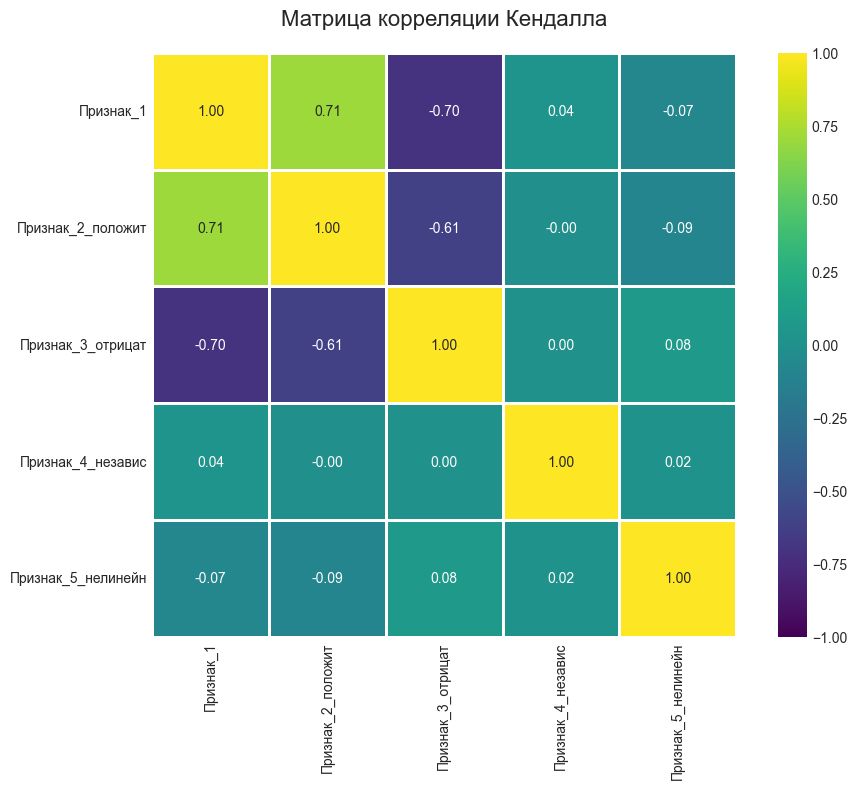


📊 Как читать матрицу Кендалла:
✓ Светлый цвет: высокая согласованность порядка
✓ Темный цвет: низкая согласованность

💡 Кендалл более консервативен, чем Спирмен
💡 Значения обычно меньше, чем у Пирсона и Спирмена


In [27]:
# Корреляция Кендалла
corr_kendall = df_corr.corr(method='kendall')

print("Матрица корреляции Кендалла:")
print(corr_kendall.round(3))

# Визуализация
plt.figure(figsize=(10, 8))
sns.heatmap(corr_kendall, annot=True, fmt='.2f', cmap='viridis', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1)
plt.title('Матрица корреляции Кендалла', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

print("\n📊 Как читать матрицу Кендалла:")
print("✓ Светлый цвет: высокая согласованность порядка")
print("✓ Темный цвет: низкая согласованность")
print("\n💡 Кендалл более консервативен, чем Спирмен")
print("💡 Значения обычно меньше, чем у Пирсона и Спирмена")

### 9.4 Сравнение всех трех методов

Визуализируем различия между методами корреляции

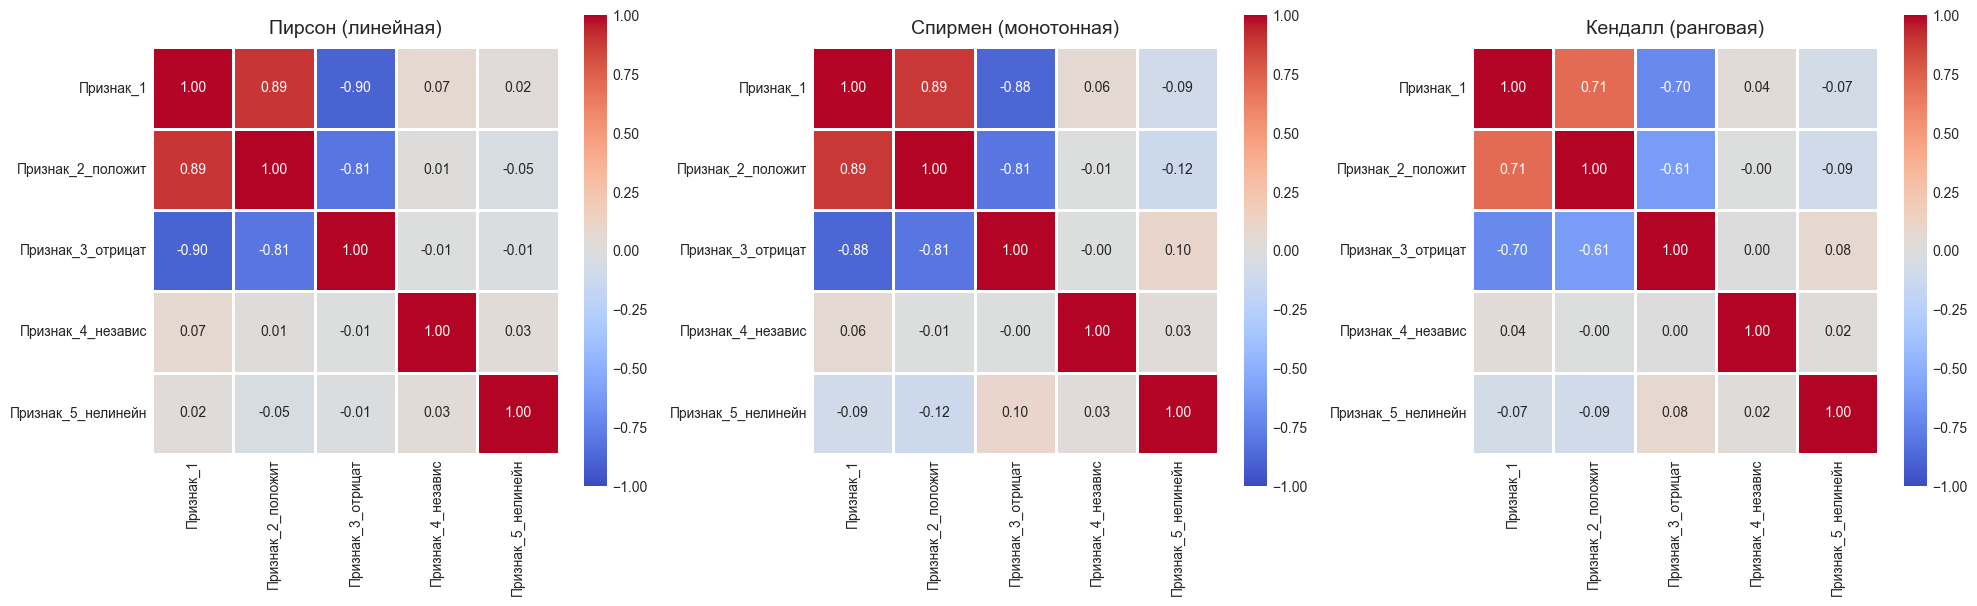


📊 СРАВНЕНИЕ МЕТОДОВ:

┌─────────────┬──────────────────┬────────────────────┬─────────────────┐
│   Метод     │   Тип связи      │   Устойчивость     │   Когда лучше   │
├─────────────┼──────────────────┼────────────────────┼─────────────────┤
│ Пирсон      │ Линейная         │ Чувствителен       │ Норм. данные    │
│ Спирмен     │ Монотонная       │ Устойчив           │ Нелинейные      │
│ Кендалл     │ Ранговая         │ Очень устойчив     │ Малые выборки   │
└─────────────┴──────────────────┴────────────────────┴─────────────────┘


In [28]:
# Сравнение трех методов
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

# Пирсон
sns.heatmap(corr_pearson, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1, ax=axes[0])
axes[0].set_title('Пирсон (линейная)', fontsize=14, pad=10)

# Спирмен
sns.heatmap(corr_spearman, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1, ax=axes[1])
axes[1].set_title('Спирмен (монотонная)', fontsize=14, pad=10)

# Кендалл
sns.heatmap(corr_kendall, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, vmin=-1, vmax=1, square=True, linewidths=1, ax=axes[2])
axes[2].set_title('Кендалл (ранговая)', fontsize=14, pad=10)

plt.tight_layout()
plt.show()

print("\n📊 СРАВНЕНИЕ МЕТОДОВ:\n")
print("┌─────────────┬──────────────────┬────────────────────┬─────────────────┐")
print("│   Метод     │   Тип связи      │   Устойчивость     │   Когда лучше   │")
print("├─────────────┼──────────────────┼────────────────────┼─────────────────┤")
print("│ Пирсон      │ Линейная         │ Чувствителен       │ Норм. данные    │")
print("│ Спирмен     │ Монотонная       │ Устойчив           │ Нелинейные      │")
print("│ Кендалл     │ Ранговая         │ Очень устойчив     │ Малые выборки   │")
print("└─────────────┴──────────────────┴────────────────────┴─────────────────┘")

### 9.5 Практическое применение: Отбор признаков

Используем корреляцию для отбора важных признаков

Корреляция признаков с целевой переменной:
Признак_1             0.970937
Признак_2_положит     0.951327
Признак_4_независ     0.036963
Признак_5_нелинейн   -0.008402
Признак_3_отрицат    -0.904370
Name: Целевая_переменная, dtype: float64


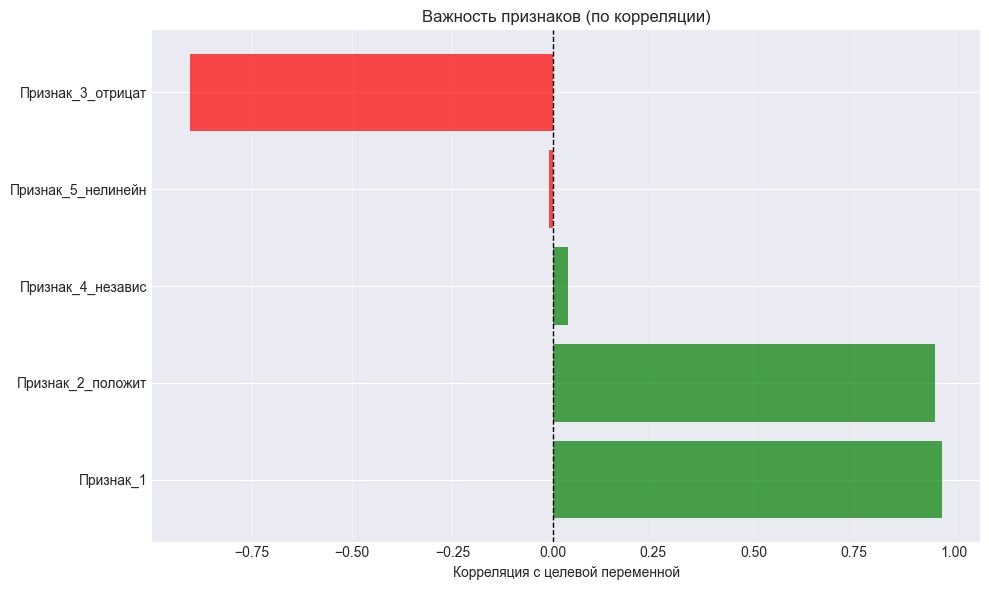


💡 Интерпретация:
✓ Признаки с высокой |корреляцией| (>0.5) - важны для модели
✓ Признаки с низкой корреляцией (<0.1) - можно удалить
✓ Положительная корреляция → признак увеличивает целевую переменную
✓ Отрицательная корреляция → признак уменьшает целевую переменную


In [29]:
# Создаем датасет с целевой переменной
df_corr['Целевая_переменная'] = (
    2 * df_corr['Признак_1'] + 
    1.5 * df_corr['Признак_2_положит'] - 
    0.5 * df_corr['Признак_3_отрицат'] +
    np.random.randn(n_samples) * 0.5
)

# Корреляция с целевой переменной
target_corr = df_corr.corr()['Целевая_переменная'].drop('Целевая_переменная').sort_values(ascending=False)

print("Корреляция признаков с целевой переменной:")
print(target_corr)

# Визуализация
plt.figure(figsize=(10, 6))
colors = ['green' if x > 0 else 'red' for x in target_corr.values]
plt.barh(target_corr.index, target_corr.values, color=colors, alpha=0.7)
plt.xlabel('Корреляция с целевой переменной')
plt.title('Важность признаков (по корреляции)')
plt.axvline(x=0, color='black', linestyle='--', linewidth=1)
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

print("\n💡 Интерпретация:")
print("✓ Признаки с высокой |корреляцией| (>0.5) - важны для модели")
print("✓ Признаки с низкой корреляцией (<0.1) - можно удалить")
print("✓ Положительная корреляция → признак увеличивает целевую переменную")
print("✓ Отрицательная корреляция → признак уменьшает целевую переменную")

### 9.6 Мультиколлинеарность

**Проблема:** Когда признаки сильно коррелируют друг с другом

![Multicollinearity](https://miro.medium.com/max/1400/1*lKqKqKqKqKqKqKqKqKqKqw.png)

**Последствия:**
- Нестабильные коэффициенты модели
- Сложно интерпретировать важность признаков
- Переобучение

⚠️ Обнаружена мультиколлинеарность:

  Признак_1 ↔ Признак_2_положит: 0.894
  Признак_1 ↔ Признак_3_отрицат: -0.897
  Признак_2_положит ↔ Признак_3_отрицат: -0.805

💡 Рекомендация: удалите один из коррелирующих признаков


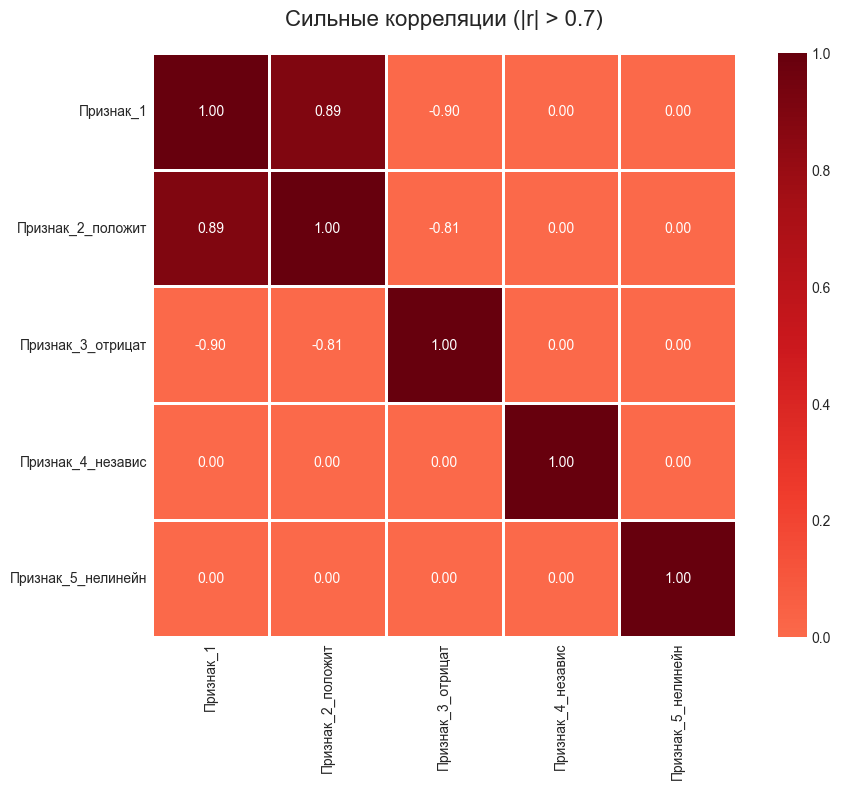

In [30]:
# Поиск мультиколлинеарности
def find_multicollinearity(corr_matrix, threshold=0.8):
    """Находит пары признаков с высокой корреляцией"""
    high_corr_pairs = []
    
    for i in range(len(corr_matrix.columns)):
        for j in range(i+1, len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i, j]) > threshold:
                high_corr_pairs.append((
                    corr_matrix.columns[i],
                    corr_matrix.columns[j],
                    corr_matrix.iloc[i, j]
                ))
    
    return high_corr_pairs

# Проверяем мультиколлинеарность
high_corr = find_multicollinearity(corr_pearson, threshold=0.7)

print("⚠️ Обнаружена мультиколлинеарность:\n")
if high_corr:
    for feat1, feat2, corr_val in high_corr:
        print(f"  {feat1} ↔ {feat2}: {corr_val:.3f}")
    print("\n💡 Рекомендация: удалите один из коррелирующих признаков")
else:
    print("  Мультиколлинеарности не обнаружено ✓")

# Визуализация только сильных корреляций
mask = np.abs(corr_pearson) < 0.7
corr_strong = corr_pearson.copy()
corr_strong[mask] = 0

plt.figure(figsize=(10, 8))
sns.heatmap(corr_strong, annot=True, fmt='.2f', cmap='Reds', 
            center=0, vmin=0, vmax=1, square=True, linewidths=1)
plt.title('Сильные корреляции (|r| > 0.7)', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

### 9.7 Применение на реальных данных Iris

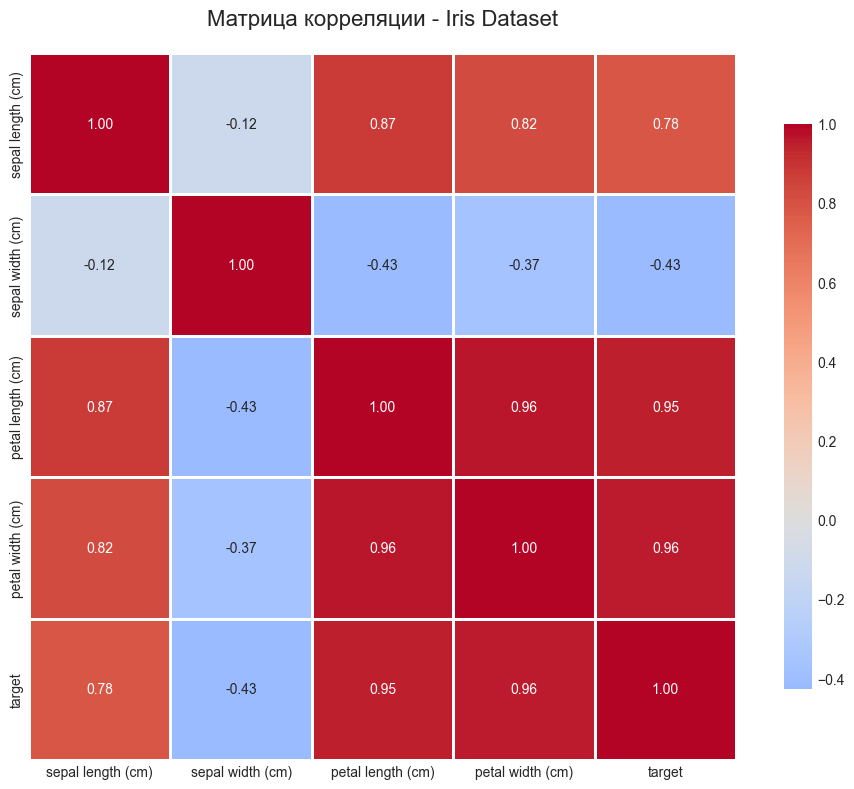


Корреляция признаков с типом цветка:
  petal width (cm)              :  0.957
  petal length (cm)             :  0.949
  sepal length (cm)             :  0.783
  sepal width (cm)              : -0.427

💡 Выводы:
  Самый важный признак: petal width (cm)
  Наименее важный признак: sepal width (cm)


In [31]:
# Анализ корреляции на датасете Iris
iris = load_iris()
df_iris = pd.DataFrame(iris.data, columns=iris.feature_names)
df_iris['target'] = iris.target

# Корреляционная матрица
corr_iris = df_iris.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_iris, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Матрица корреляции - Iris Dataset', fontsize=16, pad=20)
plt.tight_layout()
plt.show()

# Корреляция с целевой переменной
target_corr_iris = corr_iris['target'].drop('target').sort_values(ascending=False)

print("\nКорреляция признаков с типом цветка:")
for feature, corr_val in target_corr_iris.items():
    print(f"  {feature:30s}: {corr_val:6.3f}")

print("\n💡 Выводы:")
print(f"  Самый важный признак: {target_corr_iris.idxmax()}")
print(f"  Наименее важный признак: {target_corr_iris.idxmin()}")

---
## 9. K-means Clustering

**K-means** - алгоритм кластеризации (unsupervised learning), который группирует данные в K кластеров на основе схожести

### Отличия от KNN:

| Характеристика | K-means | KNN |
|----------------|---------|-----|
| **Тип** | Unsupervised (кластеризация) | Supervised (классификация) |
| **Цель** | Группировка похожих объектов | Предсказание класса |
| **K означает** | Количество кластеров | Количество соседей |
| **Метки** | Не требуются | Требуются |

### Принцип работы:
1. **Инициализация:** Случайно выбираем K центроидов
2. **Назначение:** Относим каждую точку к ближайшему центроиду
3. **Обновление:** Пересчитываем центроиды как среднее точек в кластере
4. **Повторение:** Шаги 2-3 до сходимости

In [ ]:
# Демонстрация K-means
from sklearn.cluster import KMeans
from sklearn.datasets import make_blobs

# Генерация данных с 3 кластерами
X_clusters, y_true = make_blobs(n_samples=300, centers=3, 
                                cluster_std=0.60, random_state=42)

print("Данные для кластеризации:")
print(f"Количество точек: {len(X_clusters)}")
print(f"Количество признаков: {X_clusters.shape[1]}")
print(f"Истинное количество кластеров: 3")

### 9.1 Применение K-means

In [ ]:
# Применяем K-means
kmeans = KMeans(n_clusters=3, init='k-means++', n_init=10, random_state=42)
y_pred = kmeans.fit_predict(X_clusters)

# Центроиды кластеров
centroids = kmeans.cluster_centers_

print("Результаты K-means:")
print(f"Количество итераций: {kmeans.n_iter_}")
print(f"Inertia (сумма квадратов расстояний): {kmeans.inertia_:.2f}")
print(f"\nЦентроиды кластеров:")
print(centroids)

### 9.2 Визуализация результатов

In [ ]:
# Визуализация
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Истинные кластеры
axes[0].scatter(X_clusters[:, 0], X_clusters[:, 1], c=y_true, 
                cmap='viridis', s=50, alpha=0.6)
axes[0].set_title('Истинные кластеры', fontsize=14)
axes[0].set_xlabel('Признак 1')
axes[0].set_ylabel('Признак 2')

# Результат K-means
axes[1].scatter(X_clusters[:, 0], X_clusters[:, 1], c=y_pred, 
                cmap='viridis', s=50, alpha=0.6)
axes[1].scatter(centroids[:, 0], centroids[:, 1], 
                marker='X', s=300, linewidths=3, 
                color='red', edgecolors='black', label='Центроиды')
axes[1].set_title('K-means кластеризация', fontsize=14)
axes[1].set_xlabel('Признак 1')
axes[1].set_ylabel('Признак 2')
axes[1].legend()

plt.tight_layout()
plt.show()

print("\n✅ K-means успешно нашел 3 кластера!")
print("🔴 Красные крестики - центроиды (центры кластеров)")

### 9.3 Метод локтя (Elbow Method)

Как выбрать оптимальное количество кластеров K?

In [ ]:
# Метод локтя для выбора K
inertias = []
K_range = range(1, 11)

print("Вычисляем inertia для разных K...")
for k in K_range:
    kmeans_temp = KMeans(n_clusters=k, init='k-means++', 
                         n_init=10, random_state=42)
    kmeans_temp.fit(X_clusters)
    inertias.append(kmeans_temp.inertia_)
    print(f"K={k}: inertia={kmeans_temp.inertia_:.2f}")

# График метода локтя
plt.figure(figsize=(10, 6))
plt.plot(K_range, inertias, 'bo-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров K', fontsize=12)
plt.ylabel('Inertia (сумма квадратов расстояний)', fontsize=12)
plt.title('Метод локтя для выбора оптимального K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range)

# Отмечаем оптимальное K
plt.axvline(x=3, color='red', linestyle='--', linewidth=2, 
            label='Оптимальное K=3')
plt.legend()
plt.tight_layout()
plt.show()

print("\n💡 Как читать график:")
print("✓ Ищем точку, где график начинает 'выпрямляться' (локоть)")
print("✓ В нашем случае оптимальное K = 3")
print("✓ После K=3 inertia уменьшается медленнее")

### 9.4 Silhouette Score

Еще один способ оценить качество кластеризации

In [ ]:
from sklearn.metrics import silhouette_score

# Вычисляем Silhouette Score для разных K
silhouette_scores = []
K_range_sil = range(2, 11)  # Минимум 2 кластера для silhouette

print("Вычисляем Silhouette Score для разных K...")
for k in K_range_sil:
    kmeans_temp = KMeans(n_clusters=k, init='k-means++', 
                         n_init=10, random_state=42)
    labels = kmeans_temp.fit_predict(X_clusters)
    score = silhouette_score(X_clusters, labels)
    silhouette_scores.append(score)
    print(f"K={k}: Silhouette Score={score:.3f}")

# График Silhouette Score
plt.figure(figsize=(10, 6))
plt.plot(K_range_sil, silhouette_scores, 'go-', linewidth=2, markersize=8)
plt.xlabel('Количество кластеров K', fontsize=12)
plt.ylabel('Silhouette Score', fontsize=12)
plt.title('Silhouette Score для разных K', fontsize=14)
plt.grid(True, alpha=0.3)
plt.xticks(K_range_sil)

# Отмечаем максимум
best_k = K_range_sil[silhouette_scores.index(max(silhouette_scores))]
plt.axvline(x=best_k, color='red', linestyle='--', linewidth=2, 
            label=f'Лучшее K={best_k}')
plt.legend()
plt.tight_layout()
plt.show()

print("\n💡 Интерпретация Silhouette Score:")
print("✓ Значения от -1 до 1")
print("✓ Близко к 1: отличная кластеризация")
print("✓ Близко к 0: кластеры перекрываются")
print("✓ Отрицательные: объекты в неправильных кластерах")
print(f"\n🎯 Лучшее K = {best_k} (Silhouette Score = {max(silhouette_scores):.3f})")

### 9.5 Применение на реальных данных Iris

In [ ]:
# Применяем K-means на датасете Iris
from sklearn.preprocessing import StandardScaler

# Загружаем данные
iris = load_iris()
X_iris = iris.data
y_iris = iris.target

# Масштабирование (важно для K-means!)
scaler = StandardScaler()
X_iris_scaled = scaler.fit_transform(X_iris)

# K-means с 3 кластерами (3 вида цветов)
kmeans_iris = KMeans(n_clusters=3, init='k-means++', 
                     n_init=10, random_state=42)
y_pred_iris = kmeans_iris.fit_predict(X_iris_scaled)

# Оценка качества
sil_score = silhouette_score(X_iris_scaled, y_pred_iris)

print("K-means на датасете Iris:")
print(f"Silhouette Score: {sil_score:.3f}")
print(f"Inertia: {kmeans_iris.inertia_:.2f}")
print(f"\nРаспределение по кластерам:")
unique, counts = np.unique(y_pred_iris, return_counts=True)
for cluster, count in zip(unique, counts):
    print(f"  Кластер {cluster}: {count} цветков")

# Визуализация (используем первые 2 признака)
plt.figure(figsize=(14, 5))

plt.subplot(121)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_iris, cmap='viridis', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('Истинные классы Iris')

plt.subplot(122)
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=y_pred_iris, cmap='viridis', s=50)
plt.xlabel(iris.feature_names[0])
plt.ylabel(iris.feature_names[1])
plt.title('K-means кластеры Iris')

plt.tight_layout()
plt.show()

print("\n✅ K-means успешно разделил цветы на 3 группы!")

### 9.6 Ключевые выводы о K-means

**Преимущества:**
- ✅ Простой и быстрый алгоритм
- ✅ Хорошо масштабируется на большие данные
- ✅ Легко интерпретировать результаты

**Недостатки:**
- ❌ Нужно заранее знать K
- ❌ Чувствителен к выбросам
- ❌ Предполагает сферические кластеры

**Практические советы:**
1. 🔧 Всегда масштабируйте данные (StandardScaler)
2. 📊 Используйте метод локтя для выбора K
3. 📈 Проверяйте Silhouette Score
4. 🔄 Запускайте несколько раз (n_init=10)
5. 🎯 Используйте init='k-means++' для лучшей инициализации

---
## 11. Ключевые выводы

### Что мы изучили:

1. **Типы классификации:**
   - Бинарная (2 класса)
   - Мультикласс (>2 классов, один выбор)
   - Мультилейбл (несколько классов одновременно)

2. **Работа с категориальными признаками:**
   - Label Encoding для порядковых признаков
   - One-Hot Encoding для номинальных признаков

3. **Feature Engineering:**
   - Создание новых признаков
   - Преобразование признаков
   - Масштабирование (StandardScaler, MinMaxScaler)

4. **Алгоритм KNN:**
   - Простой и интуитивный
   - Требует масштабирования данных
   - Выбор оптимального K важен

5. **Процесс обучения:**
   - Эпохи - полные проходы по данным
   - Батчи - подмножества для обновления весов
   - Градиентный спуск - метод оптимизации
   - Функция потерь - измерение ошибки

6. **Матрицы корреляции:**
   - Пирсон - для линейных зависимостей
   - Спирмен - для монотонных нелинейных
   - Кендалл - для малых выборок
   - Отбор признаков и борьба с мультиколлинеарностью

![Summary](https://miro.medium.com/max/1400/1*zKqKqKqKqKqKqKqKqKqKqw.png)

---
## 12. Дополнительные ресурсы

### Полезные ссылки:
- [Scikit-learn Documentation](https://scikit-learn.org/)
- [KNN Algorithm Explained](https://towardsdatascience.com/machine-learning-basics-with-the-k-nearest-neighbors-algorithm-6a6e71d01761)
- [Feature Engineering Guide](https://towardsdatascience.com/feature-engineering-for-machine-learning-3a5e293a5114)
- [Understanding Gradient Descent](https://towardsdatascience.com/gradient-descent-algorithm-a-deep-dive-cf04e8115f21)

### Практика:
- Kaggle Competitions
- UCI Machine Learning Repository
- Google Dataset Search

---
## Спасибо за внимание!

![Thank You](https://miro.medium.com/max/1400/1*5Kqk5Kqk5Kqk5Kqk5Kqk5w.png)

### Вопросы?